In [6]:
import numpy as np
import pandas as pd

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.datasets import load_waltons, load_canadian_senators

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [10]:
data = load_waltons()
# data = load_canadian_senators()

In [11]:
data

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


In [5]:
data['E'].mean()

0.9570552147239264

In [14]:
kmf = KaplanMeierFitter()
kmf.fit(data['T'], data['E'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

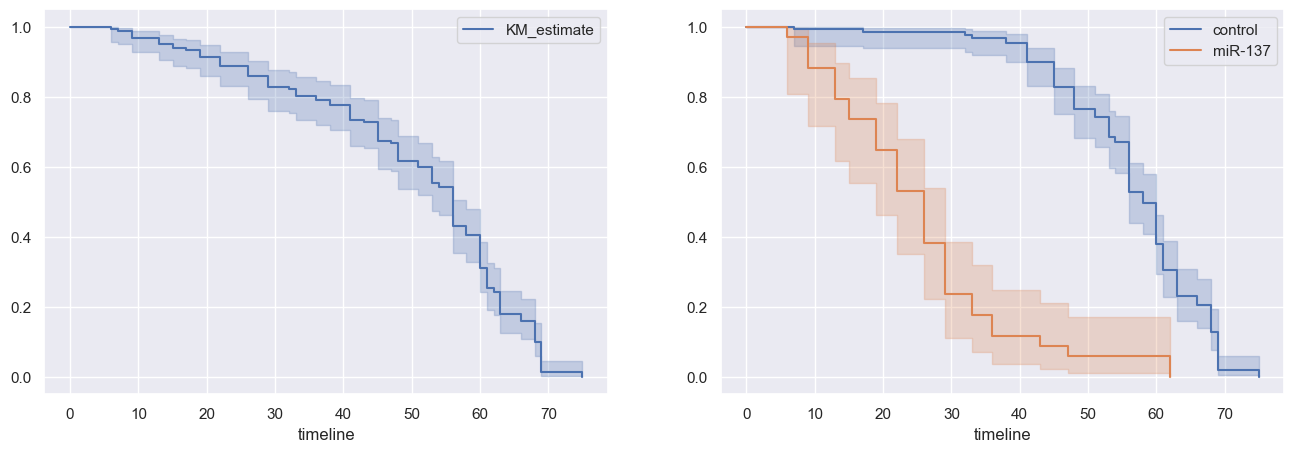

In [20]:
_, axs = plt.subplots(1, 2, figsize=(16, 5))

kmf = KaplanMeierFitter()
kmf.fit(data['T'], data['E'])
kmf.plot_survival_function(ax=axs[0])

for group, df in data.groupby('group'):
    kmf = KaplanMeierFitter()
    kmf.fit(df['T'], df['E'])
    kmf.plot_survival_function(ax=axs[1], label=group)
    

In [34]:
data['group'].value_counts()

group
control    129
miR-137     34
Name: count, dtype: int64

In [35]:
data['treatment'] = data['group'] == 'miR-137'
cox = CoxPHFitter()
cox.fit(df=data[['treatment', 'T', 'E']], duration_col='T', event_col='E')

<lifelines.CoxPHFitter: fitted with 163 total observations, 7 right-censored observations>

In [40]:
# cox.predict_survival_function(data[['treatment', 'T', 'E']])

In [41]:
# data

### kaplan meier
from scratch

$$S(t) = \prod (1 - \frac{d}{n})$$

In [66]:
times = sorted(data['T'].unique())
S = {0: 1}
last_t = 0
for t in times:
    n_events = data['E'][data['T'] == t].sum()
    n_pop = (data['T'] >= t).sum()
    event_rate = n_events / n_pop
    S[t] = S[last_t] * (1 - event_rate)
    last_t = t
S = pd.Series(S)

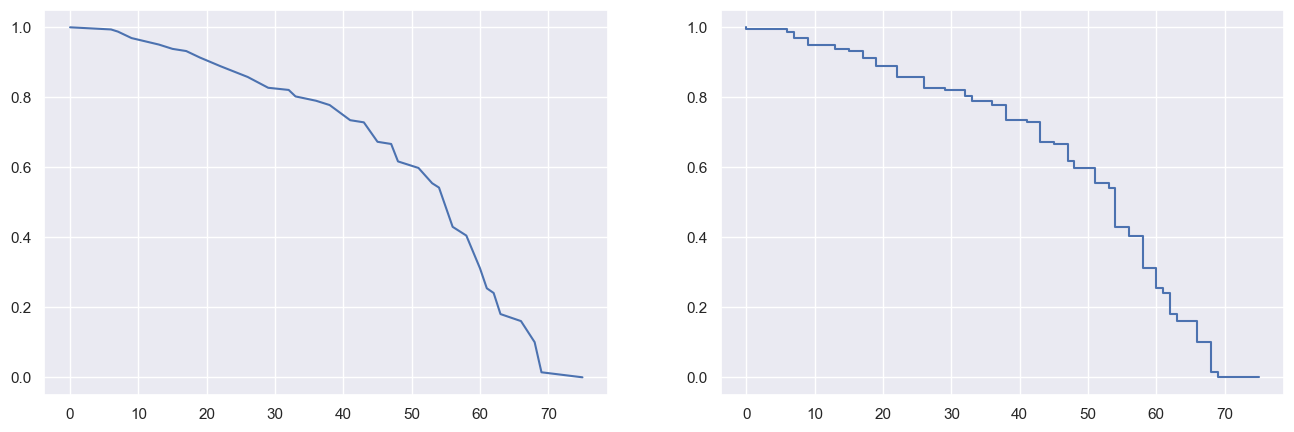

In [67]:
_, axs = plt.subplots(1, 2, figsize=(16, 5))
S.plot(ax=axs[0])
# S.step(ax=axs[0])
plt.step(S.index, S.values)

In [65]:
%%timeit
times = sorted(data['T'].unique())
S = {0: 1}
last_t = 0
for t in times:
    n_events = (data['T'] == t).sum()
    n_pop = (data['T'] >= t).sum()
    event_rate = n_events / n_pop
    S[t] = S[last_t] * (1 - event_rate)
    last_t = t
S = pd.Series(S)

1.27 ms ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
data.sort_values('T')